In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
df = pd.read_csv('data/KSI.csv')
df.shape

(16860, 57)

In [114]:
data = df[[ 'YEAR', 'DATE', 'TIME', 'HOUR', 'STREET1', 'STREET2', 'ROAD_CLASS', 'DISTRICT', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT',
 'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE', 'PEDACT', 
 'PEDCOND',  'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK','TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT',
  'ALCOHOL', 'DISABILITY', 'POLICE_DIVISION','NEIGHBOURHOOD']]


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   YEAR             16860 non-null  int64 
 1   DATE             16860 non-null  object
 2   TIME             16860 non-null  int64 
 3   HOUR             16860 non-null  int64 
 4   STREET1          16860 non-null  object
 5   STREET2          16860 non-null  object
 6   ROAD_CLASS       16860 non-null  object
 7   DISTRICT         16860 non-null  object
 8   LOCCOORD         16860 non-null  object
 9   ACCLOC           16860 non-null  object
 10  TRAFFCTL         16860 non-null  object
 11  VISIBILITY       16860 non-null  object
 12  LIGHT            16860 non-null  object
 13  RDSFCOND         16860 non-null  object
 14  ACCLASS          16860 non-null  object
 15  IMPACTYPE        16860 non-null  object
 16  INVTYPE          16860 non-null  object
 17  INVAGE           16860 non-null

In [116]:
data.describe()

,YEAR,TIME,HOUR
count,16860.000000,16860.000000,16860.000000
mean,2012.256168,1352.106821,13.241103
std,4.252797,629.726747,6.302679
min,2006.000000,0.000000,0.000000
25%,2009.000000,913.000000,9.000000
50%,2012.000000,1442.000000,14.000000
75%,2016.000000,1845.000000,18.000000
max,2020.000000,2359.000000,23.000000


In [117]:
data.head()

,YEAR,DATE,TIME,HOUR,STREET1,STREET2,ROAD_CLASS,DISTRICT,LOCCOORD,ACCLOC,...,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,NEIGHBOURHOOD
0,2006,2006/03/11 05:00:00+00,852,8,BLOOR ST W,DUNDAS ST W,Major Arterial,Toronto and East York,Intersection,At Intersection,...,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,High Park North (88)
1,2006,2006/03/11 05:00:00+00,852,8,BLOOR ST W,DUNDAS ST W,Major Arterial,Toronto and East York,Intersection,At Intersection,...,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,High Park North (88)
2,2006,2006/03/11 05:00:00+00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,Major Arterial,Scarborough,Intersection,At Intersection,...,<Null>,<Null>,<Null>,<Null>,Yes,Yes,<Null>,<Null>,D42,Rouge (131)
3,2006,2006/03/11 05:00:00+00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,Major Arterial,Scarborough,Intersection,At Intersection,...,<Null>,<Null>,<Null>,<Null>,Yes,Yes,<Null>,<Null>,D42,Rouge (131)
4,2006,2006/03/12 05:00:00+00,240,2,EGLINTON AVE E,COMMONWEALTH AVE,Major Arterial,Scarborough,Mid-Block,<Null>,...,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,D41,Eglinton East (138)


### Exploratory Data Analysis

In [118]:
# Accident Class
round(df.ACCLASS.value_counts()/len(df) * 100, 2)

Non-Fatal Injury        86.36
Fatal                   13.62
Property Damage Only     0.01
Name: ACCLASS, dtype: float64

<AxesSubplot:xlabel='ACCLASS', ylabel='count'>

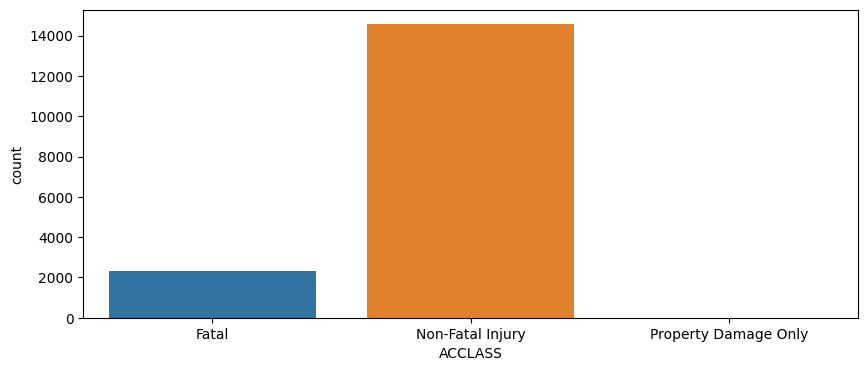

In [119]:
plt.figure(figsize=(10,4))
sns.countplot(x=df['ACCLASS'])

<AxesSubplot:xlabel='YEAR'>

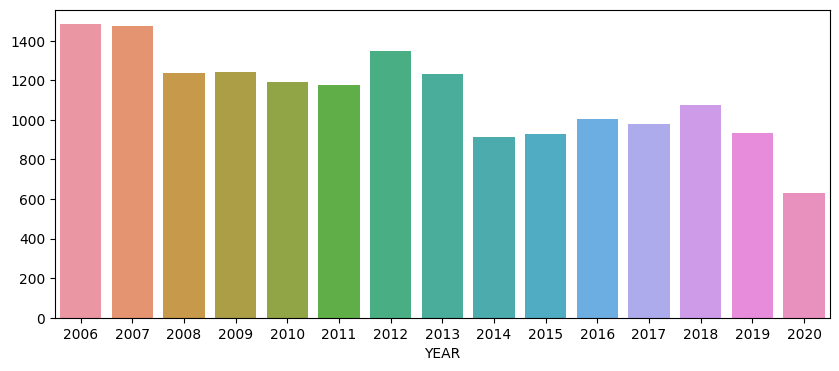

In [120]:
plt.figure(figsize=(10,4))
f = data.groupby('YEAR')['ACCLASS'].count()
sns.barplot(x=f.index, y=f.values)


<AxesSubplot:xlabel='YEAR', ylabel='No of Victims'>

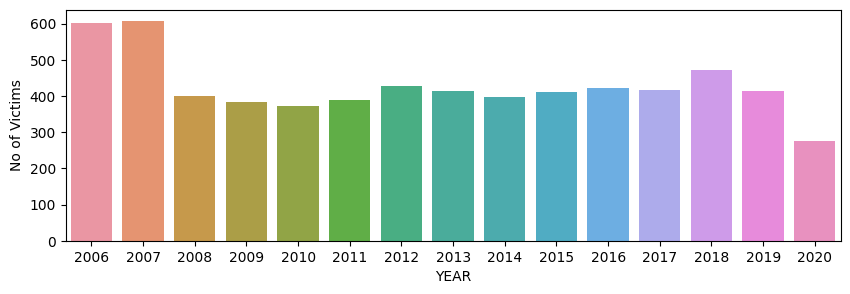

In [121]:
plt.figure(figsize=(10,3))
plt.ylabel('No of Victims')
injury = data[data['INJURY'] == 'None']
v = injury.groupby('YEAR')['ACCLASS'].count()
sns.barplot(x=v.index, y=v.values)



In [122]:
data['INJURY'] = data['INJURY'].replace('<Null>', 'None')
round(data.INJURY.value_counts()/len(data) * 100, 2)

C:\Users\HP\AppData\Local\Temp\ipykernel_16324\3061419250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['INJURY'] = data['INJURY'].replace('<Null>', 'None')


None       47.56
Major      33.62
Minor       7.78
Minimal     6.18
Fatal       4.87
Name: INJURY, dtype: float64

In [139]:
sum([5668, 1311, 1042,  821])

8842

In [123]:
data['DATE'] = pd.to_datetime(data['DATE'])
data['DAY'] = data['DATE'].dt.day_name()

C:\Users\HP\AppData\Local\Temp\ipykernel_16324\884718231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DATE'] = pd.to_datetime(data['DATE'])
C:\Users\HP\AppData\Local\Temp\ipykernel_16324\884718231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DAY'] = data['DATE'].dt.day_name()


In [127]:
data.groupby('DAY')['ACCLASS'].count()

DAY
Friday       2750
Monday       2270
Saturday     2309
Sunday       2300
Thursday     2331
Tuesday      2494
Wednesday    2406
Name: ACCLASS, dtype: int64

In [129]:
data.groupby('HOUR')['ACCLASS'].count()

HOUR
0      557
1      408
2      465
3      421
4      172
5      286
6      512
7      543
8      668
9      686
10     723
11     714
12     741
13     855
14     933
15    1000
16     986
17    1095
18    1137
19     940
20     922
21     844
22     695
23     557
Name: ACCLASS, dtype: int64

In [131]:
data['ACCLOC'].value_counts()

At Intersection          8060
<Null>                   5450
Non Intersection         1968
Intersection Related     1019
At/Near Private Drive     318
Private Driveway           13
Laneway                    13
Overpass or Bridge         12
Underpass or Tunnel         6
Trail                       1
Name: ACCLOC, dtype: int64

In [133]:
data['INVAGE'].value_counts()

unknown     2573
20 to 24    1561
25 to 29    1504
30 to 34    1248
50 to 54    1222
35 to 39    1205
40 to 44    1181
45 to 49    1153
55 to 59     993
60 to 64     796
15 to 19     766
65 to 69     614
70 to 74     488
75 to 79     402
80 to 84     307
10 to 14     231
85 to 89     196
5 to 9       183
0 to 4       167
90 to 94      56
Over 95       14
Name: INVAGE, dtype: int64

In [134]:
data['INVTYPE'].value_counts()

Driver                  7618
Pedestrian              2871
Passenger               2543
Vehicle Owner           1636
Cyclist                  726
Motorcycle Driver        607
Truck Driver             316
Other Property Owner     257
Other                    174
Motorcycle Passenger      32
Moped Driver              27
Driver - Not Hit          17
Wheelchair                13
<Null>                    12
In-Line Skater             5
Trailer Owner              2
Cyclist Passenger          2
Pedestrian - Not Hit       1
Witness                    1
Name: INVTYPE, dtype: int64

In [142]:
data.head(1).transpose().to_csv('await.csv')